<a href="https://colab.research.google.com/github/chaiminwoo0223/Data-Science/blob/main/03%20-%20Bike_Sharing_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 탐색적 데이터 분석
## 1.데이터 불러오기

In [1]:
import numpy as np
import pandas as pd

data_path = '/content/drive/MyDrive/Data-Science/02/bike-sharing-demand/' # 데이터 경로
train = pd.read_csv(data_path + 'train.csv') # 훈련 데이터
test = pd.read_csv(data_path + 'test.csv') # 테스트 데이터
submission = pd.read_csv(data_path + 'sampleSubmission.csv') # 제출 샘플 데이터

In [2]:
train.shape, test.shape, submission.shape

((10886, 12), (6493, 9), (6493, 2))

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


## 2.피처 엔지니어링

In [8]:
print(train["datetime"][100]) # datetime 100번째 원소
print(train["datetime"][100].split()) # 공백 기준으로 문자열 나누기
print(train["datetime"][100].split()[0]) # 날짜
print(train["datetime"][100].split()[1]) # 시간

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [9]:
print(train["datetime"][100].split()[0]) # 날짜
print(train["datetime"][100].split()[0].split("-")) # "-" 기준으로 문자열 나누기
print(train["datetime"][100].split()[0].split("-")[0]) # 연도
print(train["datetime"][100].split()[0].split("-")[1]) # 월
print(train["datetime"][100].split()[0].split("-")[2]) # 일

2011-01-05
['2011', '01', '05']
2011
01
05


In [10]:
print(train["datetime"][100].split()[1]) # 시간
print(train["datetime"][100].split()[1].split(":")) # ":" 기준으로 문자열 나누기
print(train["datetime"][100].split()[1].split(":")[0]) # 시
print(train["datetime"][100].split()[1].split(":")[1]) # 분
print(train["datetime"][100].split()[1].split(":")[2]) # 초

09:00:00
['09', '00', '00']
09
00
00


In [11]:
train["date"] = train["datetime"].apply(lambda x: x.split()[0]) # 날짜 피처 생성
train["year"] = train["datetime"].apply(lambda x: x.split()[0].split("-")[0]) # 연도
train["month"] = train["datetime"].apply(lambda x: x.split()[0].split("-")[1]) # 월
train["day"] = train["datetime"].apply(lambda x: x.split()[0].split("-")[2]) # 일
train["hour"] = train["datetime"].apply(lambda x: x.split()[1].split(":")[0]) # 시
train["minute"] = train["datetime"].apply(lambda x: x.split()[1].split(":")[1]) # 분
train["second"] = train["datetime"].apply(lambda x: x.split()[1].split(":")[2]) # 초

In [12]:
from datetime import datetime
import calendar

print(train["date"][100]) # 날짜
print(datetime.strptime(train["date"][100], "%Y-%m-%d")) # datetime 타입으로 변경
print(datetime.strptime(train["date"][100], "%Y-%m-%d").weekday()) # 정수로 요일 변환
print(calendar.day_name[datetime.strptime(train["date"][100], "%Y-%m-%d").weekday()]) # 문자열로 요일 변환

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [13]:
train["weekday"] = train["date"].apply(
lambda dateString: calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()]) # 요일
train["season"] = train["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}) # 계절
train["weather"] = train["weather"].map({1: "Clear", 2: "Mist, Few Clouds",
                                         3: "Light, Snow, Rain, Tunderstorm",
                                         4: "Heavy Rain, Tunderstorm, Snow, Fog"}) # 날씨

In [14]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


## 3.데이터 시각화

In [15]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

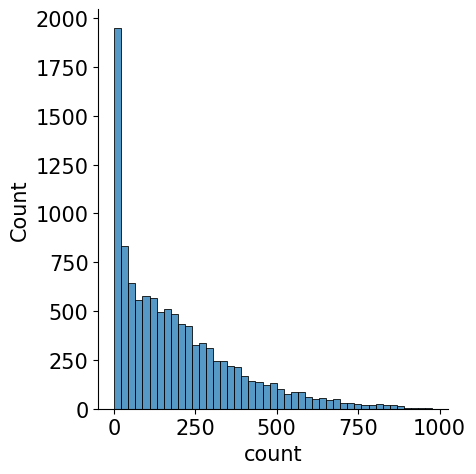

In [16]:
# 분포도
mpl.rc("font", size=15)
sns.displot(train["count"])

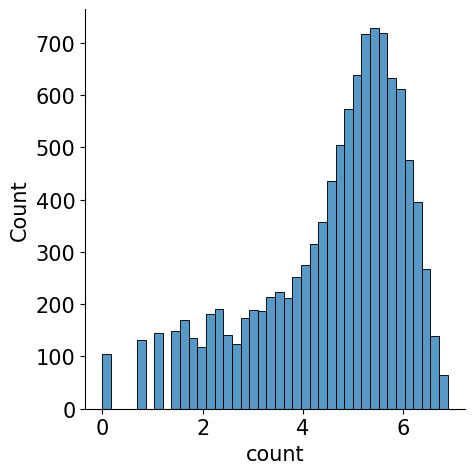

In [17]:
sns.displot(np.log(train["count"]))

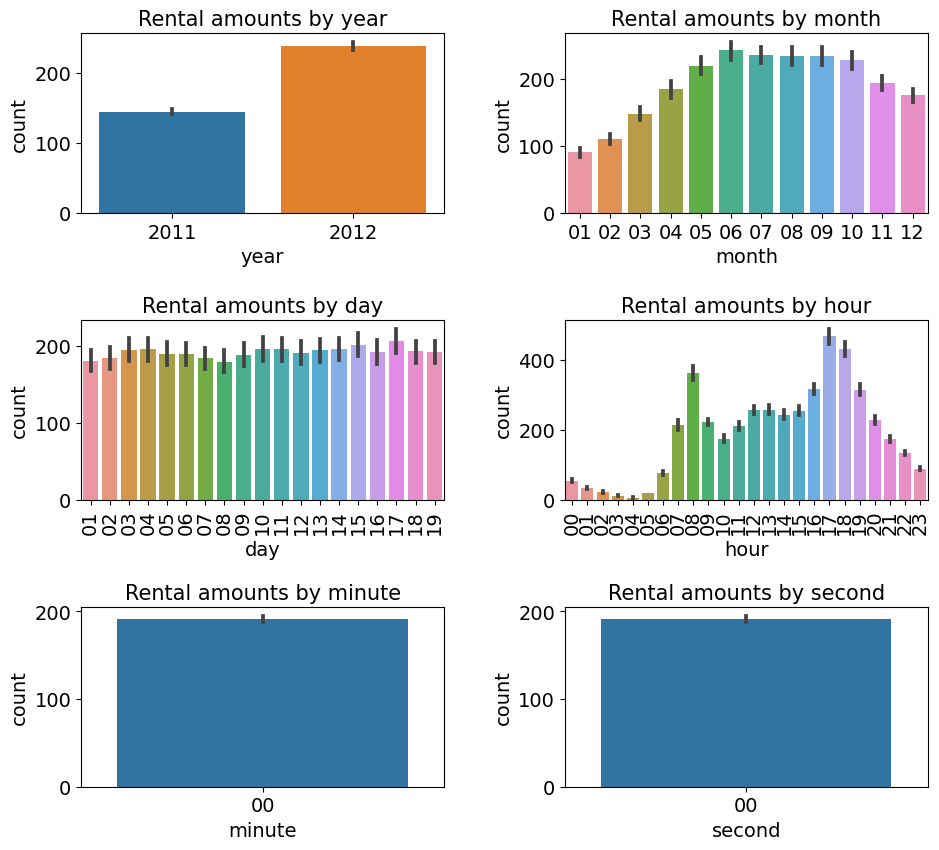

In [18]:
# 막대 그래프
mpl.rc("font", size=14) # 폰트 크기 설정
mpl.rc("axes", titlesize=15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 Figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(10, 9) # 전체 Figure 크기를 10X9 인치로 설정

sns.barplot(x="year", y="count", data=train, ax=axes[0, 0]) # 연도
sns.barplot(x="month", y="count", data=train, ax=axes[0, 1]) # 월
sns.barplot(x="day", y="count", data=train, ax=axes[1, 0]) # 일
sns.barplot(x="hour", y="count", data=train, ax=axes[1, 1]) # 시
sns.barplot(x="minute", y="count", data=train, ax=axes[2, 0]) # 분
sns.barplot(x="second", y="count", data=train, ax=axes[2, 1]) # 초

axes[0, 0].set(title="Rental amounts by year")
axes[0, 1].set(title="Rental amounts by month")
axes[1, 0].set(title="Rental amounts by day")
axes[1, 1].set(title="Rental amounts by hour")
axes[2, 0].set(title="Rental amounts by minute")
axes[2, 1].set(title="Rental amounts by second")

axes[1, 0].tick_params(axis="x", labelrotation=90)
axes[1, 1].tick_params(axis="x", labelrotation=90)

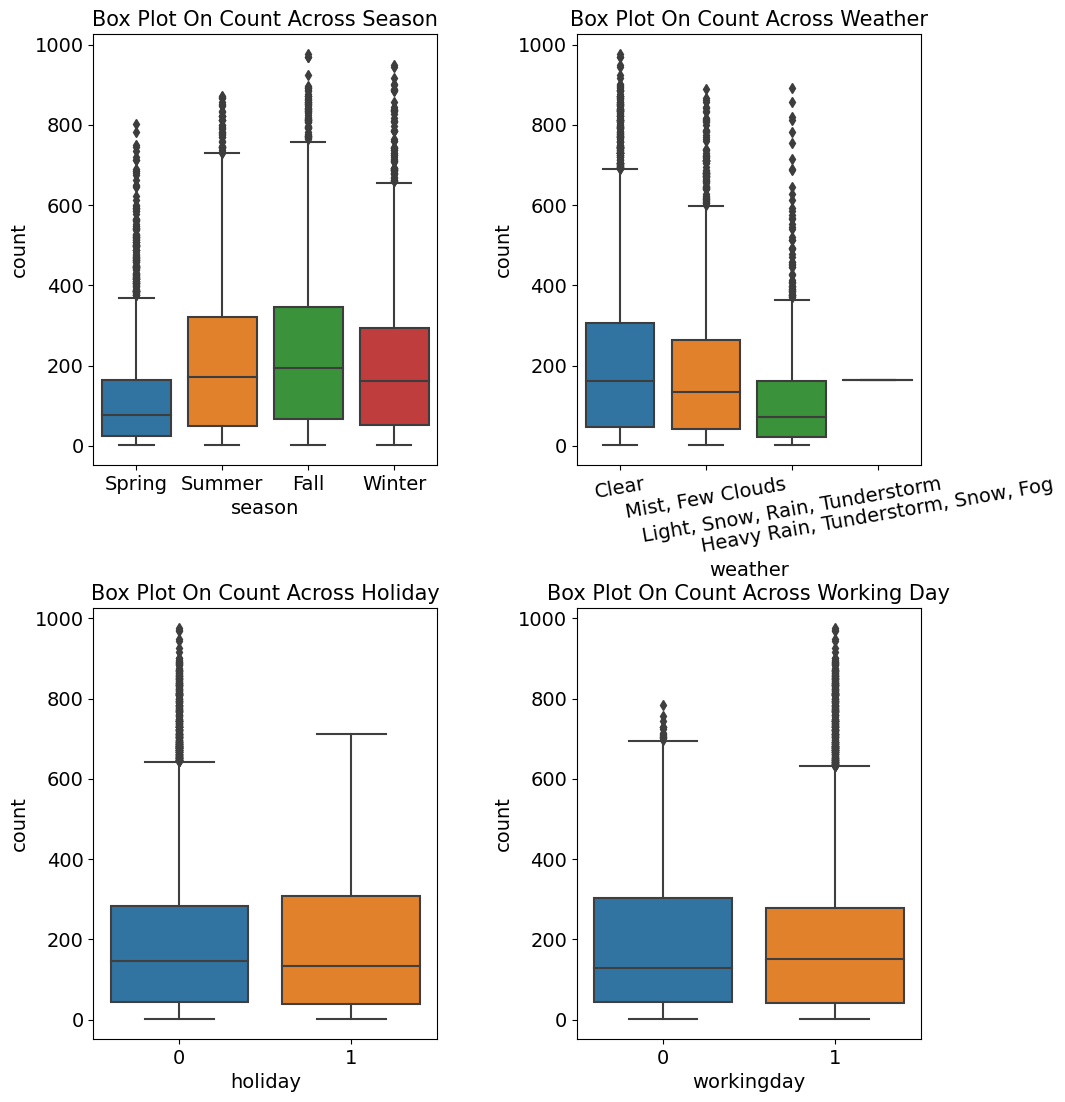

In [19]:
# 박스플롯
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열 Figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(10, 12) # 전체 Figure 크기를 10X12 인치로 설정

sns.boxplot(x="season", y="count", data=train, ax=axes[0, 0])
sns.boxplot(x="weather", y="count", data=train, ax=axes[0, 1])
sns.boxplot(x="holiday", y="count", data=train, ax=axes[1, 0])
sns.boxplot(x="workingday", y="count", data=train, ax=axes[1, 1])

axes[0, 0].set(title="Box Plot On Count Across Season")
axes[0, 1].set(title="Box Plot On Count Across Weather")
axes[1, 0].set(title="Box Plot On Count Across Holiday")
axes[1, 1].set(title="Box Plot On Count Across Working Day")

axes[0, 1].tick_params(axis="x", labelrotation=10)

<Axes: xlabel='hour', ylabel='count'>

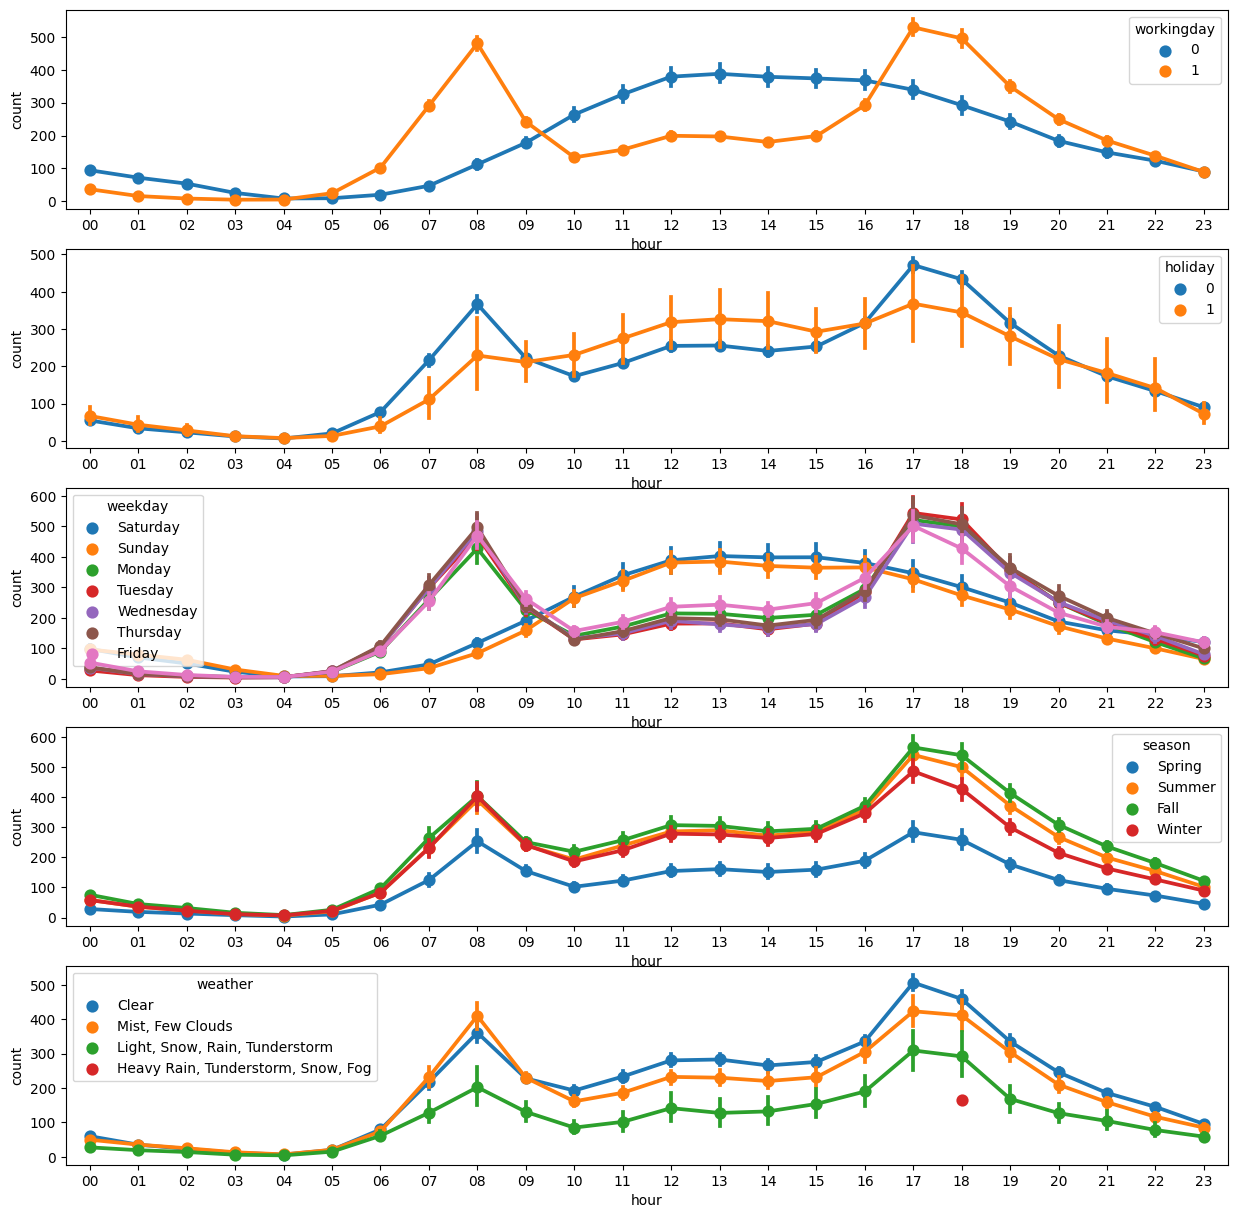

In [20]:
# 포인트플롯
mpl.rc("font", size=10) # 폰트 크기 설정
figure, axes = plt.subplots(nrows=5) # 5행 1열 Figure 생성
figure.set_size_inches(15, 15) # 전체 Figure 크기를 15X15 인치로 설정

sns.pointplot(x="hour", y="count", data=train, hue="workingday", ax=axes[0])
sns.pointplot(x="hour", y="count", data=train, hue="holiday", ax=axes[1])
sns.pointplot(x="hour", y="count", data=train, hue="weekday", ax=axes[2])
sns.pointplot(x="hour", y="count", data=train, hue="season", ax=axes[3])
sns.pointplot(x="hour", y="count", data=train, hue="weather", ax=axes[4])

<Axes: xlabel='humidity', ylabel='count'>

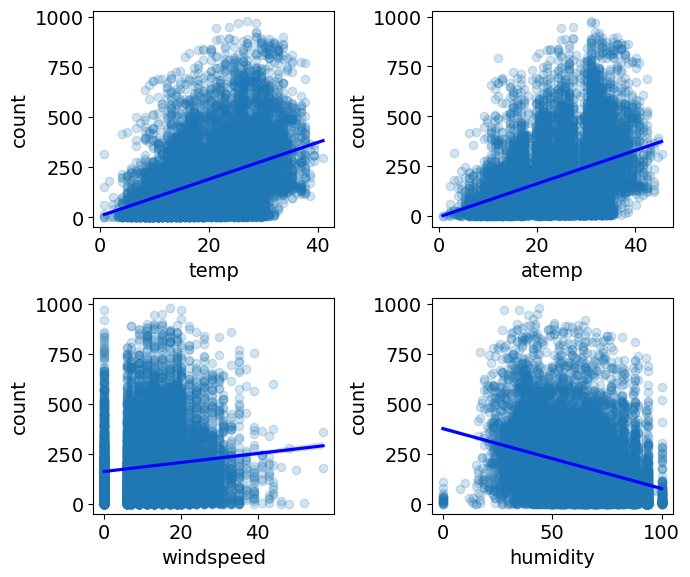

In [21]:
# 회귀선을 포함한 삼점도 그래프
mpl.rc("font", size=14) # 폰트 크기 설정
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열 Figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(7, 6) # 전체 Figure 크기를 7X6 인치로 설정

sns.regplot(x="temp", y="count", data=train, ax=axes[0, 0], scatter_kws={"alpha": 0.2}, line_kws={"color": "blue"})
sns.regplot(x="atemp", y="count", data=train, ax=axes[0, 1], scatter_kws={"alpha": 0.2}, line_kws={"color": "blue"})
sns.regplot(x="windspeed", y="count", data=train, ax=axes[1, 0], scatter_kws={"alpha": 0.2}, line_kws={"color": "blue"})
sns.regplot(x="humidity", y="count", data=train, ax=axes[1, 1], scatter_kws={"alpha": 0.2}, line_kws={"color": "blue"})

[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

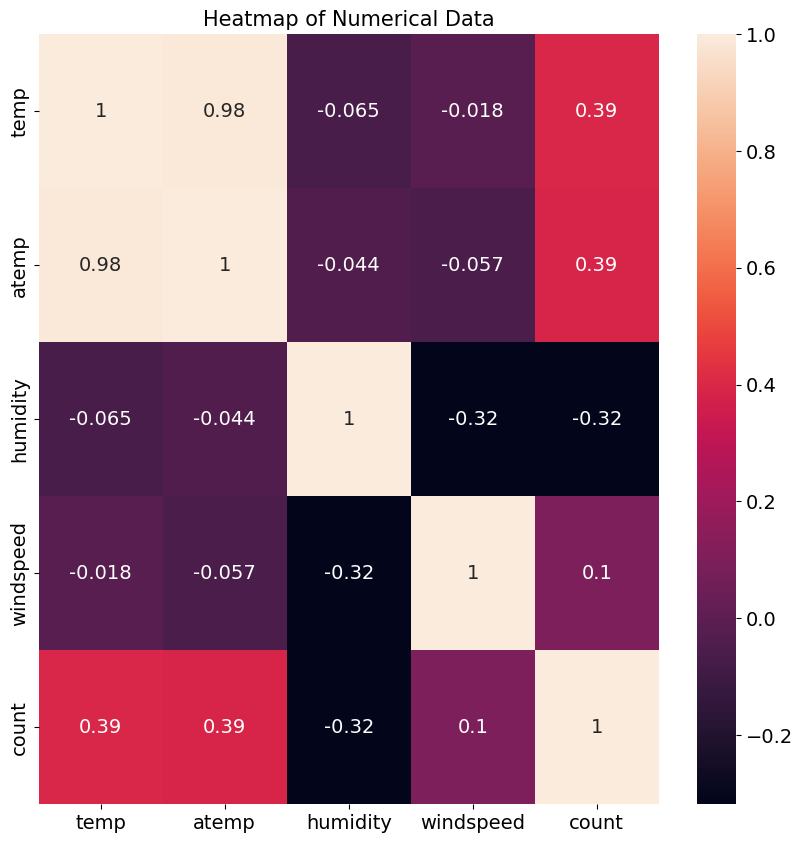

In [22]:
# 히트맵
corrMat = train[["temp", "atemp", "humidity", "windspeed", "count"]].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True)
ax.set(title="Heatmap of Numerical Data")

# 베이스라인 모델
## 1.피처 엔지니어링

In [23]:
import pandas as pd

data_path = '/content/drive/MyDrive/Data-Science/02/bike-sharing-demand/' # 데이터 경로
train = pd.read_csv(data_path + 'train.csv') # 훈련 데이터
test = pd.read_csv(data_path + 'test.csv') # 테스트 데이터
submission = pd.read_csv(data_path + 'sampleSubmission.csv') # 제출 샘플 데이터

In [24]:
# 이상치 제거
train = train[train["weather"] != 4]

In [25]:
# 데이터 합치기
all_data_temp = pd.concat([train, test])
all_data_temp

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [26]:
all_data = pd.concat([train, test], ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [27]:
# 파생 피처 추가
from datetime import datetime

all_data["date"] = all_data["datetime"].apply(lambda x: x.split()[0]) # 날짜 피처 생성
all_data["year"] = all_data["datetime"].apply(lambda x: x.split()[0].split("-")[0]) # 연도
all_data["month"] = all_data["datetime"].apply(lambda x: x.split()[0].split("-")[1]) # 월
all_data["hour"] = all_data["datetime"].apply(lambda x: x.split()[1].split(":")[0]) # 시
all_data["weekday"] = all_data["date"].apply(
lambda dateString: datetime.strptime(dateString, "%Y-%m-%d").weekday()) # 요일


In [28]:
# 필요 없는 피처 제거
drop_features = ["casual", "registered", "datetime", "date", "windspeed", "month"]
all_data = all_data.drop(drop_features, axis=1)

In [29]:
# 데이터 나누기
X_train = all_data[~pd.isnull(all_data["count"])]
X_test = all_data[pd.isnull(all_data["count"])]

In [30]:
# 타깃값 count 제거
X_train = X_train.drop(["count"], axis=1)
X_test = X_test.drop(["count"], axis=1)
y = train["count"] # 타깃값

In [31]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,00,5
1,1,0,0,1,9.02,13.635,80,2011,01,5
2,1,0,0,1,9.02,13.635,80,2011,02,5
3,1,0,0,1,9.84,14.395,75,2011,03,5
4,1,0,0,1,9.84,14.395,75,2011,04,5


## 2.평가지표: RMSLE

In [32]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)

    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    output = np.sqrt(np.mean((log_true - log_pred)**2)) # RMSLE
    return output

## 3.모델 훈련

In [33]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
log_y = np.log(y) # 타깃값 로그변환(정규분포)
linear_reg_model.fit(X_train, log_y) # 훈련(선형회귀)

LinearRegression()

## 4.모델 성능 검증

In [34]:
preds = linear_reg_model.predict(X_train)
print (f'선형 회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

선형 회귀의 RMSLE 값 : 1.0205


## 5.예측 및 결과 제출

In [35]:
linearreg_preds = linear_reg_model.predict(X_test) # 예측
submission['count'] = np.exp(linearreg_preds) # 지수변환
submission.to_csv('submission.csv', index=False) # 파일로 저장

# 성능 개선 I
## 1.릿지 회귀 모델
- L1 규제를 적용한 선형 회귀 모델

In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()
ridge_params = {"max_iter": [3000],"alpha": [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

In [37]:
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model, param_grid=ridge_params,
                                     scoring=rmsle_scorer, cv=5)
log_y = np.log(y) # 타깃값 로그변환(정규분포)
gridsearch_ridge_model.fit(X_train, log_y) # 훈련(그리드서치)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [38]:
print('최적 하이퍼파라미터 :', gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.1, 'max_iter': 3000}


## 2.성능 검증

In [39]:
preds = gridsearch_ridge_model.best_estimator_.predict(X_train) # 예측
print(f'릿지 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}') # 평가

릿지 회귀 RMSLE 값 : 1.0205


# 성능 개선 II
## 1.라쏘 회귀 모델
- L2 규제를 적용한 선형 회귀 모델

In [40]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso_model = Lasso()
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {"max_iter": [3000],"alpha": lasso_alpha}

In [41]:
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model, param_grid=lasso_params,
                                     scoring=rmsle_scorer, cv=5)
log_y = np.log(y) # 타깃값 로그변환(정규분포)
gridsearch_lasso_model.fit(X_train, log_y) # 훈련(그리드서치)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e+01, 1.00000000e+00, 5.00000000e-01, 3.33333333e-01,
       2.50000000e-01, 1.00000000e-01, 3.33333333e-02, 1.00000000e-02,
       5.00000000e-03, 3.33333333e-03, 2.50000000e-03, 1.25000000e-03,
       1.11111111e-03, 1.00000000e-03]),
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [42]:
print('최적 하이퍼파라미터 :', gridsearch_lasso_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.00125, 'max_iter': 3000}


## 2.성능 검증

In [43]:
preds = gridsearch_lasso_model.best_estimator_.predict(X_train) # 예측
print(f'라쏘 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}') # 평가

라쏘 회귀 RMSLE 값 : 1.0205


# 성능 개선 III
## 1.랜덤 포레스트 회귀 모델

In [44]:
from sklearn.ensemble import RandomForestRegressor

randomforest_model = RandomForestRegressor()
rf_params = {"random_state": [42], "n_estimators": [100, 120, 140]}

In [45]:
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model, param_grid=rf_params,
                                              scoring=rmsle_scorer, cv=5)
log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train, log_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 120, 140], 'random_state': [42]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [46]:
print('최적 하이퍼파라미터 :', gridsearch_random_forest_model.best_params_)

최적 하이퍼파라미터 : {'n_estimators': 140, 'random_state': 42}


## 2.성능 검증

In [47]:
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train) #예측
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}') #평가

랜덤 포레스트 회귀 RMSLE 값 : 0.1127


In [48]:
randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test) # 예측
submission['count'] = np.exp(randomforest_preds) # 지수변환
submission.to_csv('submission.csv', index=False) # 파일로 저장